
# Actuarial Inventory Visualizations (CIO Deck)

This notebook generates **three slide‑ready charts** and an optional **PowerPoint slide** for the CIO deck:

- **Assets by Functional Area** (bar chart)
- **Complexity Bands** (100% stacked bar)
- **Scheduling Types** (bar chart)

**Sources for counts**: Cognizant’s *Actuarial_Inventory_Summary.xlsx* (Grand Total = **N=506**) and the long‑form current‑state report.

> Outputs:
> - `charts/functional_area_bar.png`
> - `charts/complexity_bands_stacked_bar.png`
> - `charts/scheduling_types_bar.png`
> - *(optional)* `Actuarial_Inventory_Overview_Slide1.ipynb_generated.pptx`




## Setup & Data

This cell loads required libraries, creates an output directory, and defines the **inventory counts** for:
- Functional Areas
- Complexity Bands (by LOC)
- Scheduling Types (cadence)




import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Output directory for charts
out_dir = Path('charts')
out_dir.mkdir(exist_ok=True)

# Functional area counts (from current-state report/inventory)
functional_counts = {
    'Analytics': 177,
    'Modeling': 87,
    'Pricing': 59,
    'Reserving': 140,
    'Statistical Reporting': 41,
}

# Complexity bands (Actuarial_Inventory_Summary.xlsx)
complexity_counts = {
    'Simple (<500 LOC)': 329,
    'Medium (501–1000 LOC)': 89,
    'Complex (1001–2000 LOC)': 58,
    'Very Complex (>2000 LOC)': 30,
}

# Scheduling types (Actuarial_Inventory_Summary.xlsx)
scheduling_counts = {
    'Ad hoc': 18,
    'Daily': 17,
    'Monthly': 136,
    'Quarterly': 123,
    'Annual': 74,
    'Weekly': 16,
    'Unknown': 122,
}

sns.set_theme(style='whitegrid', font_scale=1.2)
print('Data loaded. Ready to render charts.')


In [3]:


# Actuarial Inventory Visualizations (CIO Deck)
# Generates three slide-ready charts and an optional PPTX slide.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Output directory for charts
out_dir = Path('charts'); out_dir.mkdir(exist_ok=True)

# Functional area counts (from current-state report/inventory)
functional_counts = {
    'Analytics': 177,
    'Modeling': 87,
    'Pricing': 59,
    'Reserving': 140,
    'Statistical Reporting': 41,
}

# Complexity bands (Actuarial_Inventory_Summary.xlsx)
complexity_counts = {
    'Simple (<500 LOC)': 329,
    'Medium (501–1000 LOC)': 89,
    'Complex (1001–2000 LOC)': 58,
    'Very Complex (>2000 LOC)': 30,
}

# Scheduling types (Actuarial_Inventory_Summary.xlsx)
scheduling_counts = {
    'Ad hoc': 18,
    'Daily': 17,
    'Monthly': 136,
    'Quarterly': 123,
    'Annual': 74,
    'Weekly': 16,
    'Unknown': 122,
}

sns.set_theme(style='whitegrid', font_scale=1.2)
print('Data loaded. Ready to render charts.')


Data loaded. Ready to render charts.



## 1) Assets by Functional Area (bar chart)

Generates a bar chart showing the asset distribution across **Analytics, Modeling, Pricing, Reserving,** and **Statistical Reporting**.  
Exports to: `charts/functional_area_bar.png`.


C:\Users\bbrewer1\AppData\Local\Temp\ipykernel_38940\1839778070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fa_df, x='Functional Area', y='Assets',


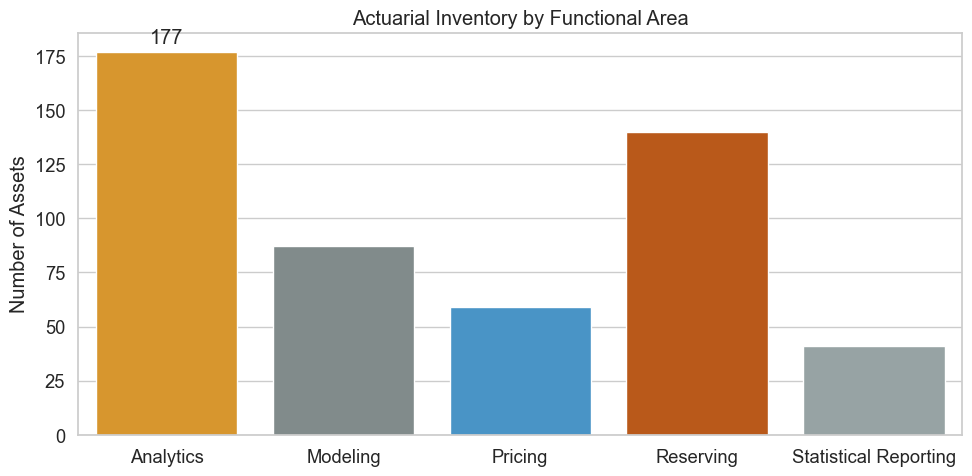

Exported: charts\functional_area_bar.png


In [4]:

# 1) Assets by Functional Area (bar chart)
fa_df = pd.DataFrame({'Functional Area': list(functional_counts.keys()),
                      'Assets': list(functional_counts.values())})
plt.figure(figsize=(10,5))
ax = sns.barplot(data=fa_df, x='Functional Area', y='Assets',
                 palette=['#f39c12','#7f8c8d','#3498db','#d35400','#95a5a6'])
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
ax.set_title('Actuarial Inventory by Functional Area')
ax.set_xlabel(''); ax.set_ylabel('Number of Assets')
plt.tight_layout()
fa_path = out_dir / 'functional_area_bar.png'
plt.savefig(fa_path, dpi=300)
plt.show()
print(f'Exported: {fa_path}')



## 2) Complexity Bands (100% stacked bar)

Creates a **100% stacked bar** to show the share of assets in each **LOC band**:
- Simple \<500
- Medium 501–1000
- Complex 1001–2000
- Very Complex \>2000

Exports to: `charts/complexity_bands_stacked_bar.png`.


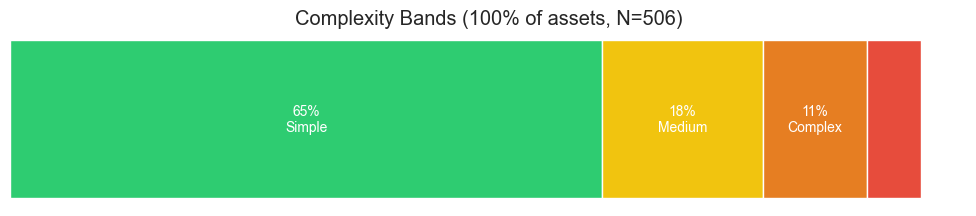

Exported: charts\complexity_bands_stacked_bar.png


In [5]:

# 2) Complexity Bands (100% stacked bar)
comp_df = pd.DataFrame({'Band': list(complexity_counts.keys()),
                        'Assets': list(complexity_counts.values())})
comp_total = comp_df['Assets'].sum()
colors = ['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']

plt.figure(figsize=(10,2.4))
left = 0
for i, (label, count) in enumerate(zip(comp_df['Band'], comp_df['Assets'])):
    width = count / comp_total
    plt.barh([0], width, left=left, color=colors[i])
    if width > 0.08:
        pct_label = f"{(width*100):.0f}%\n{label.split(' ')[0]}"
        plt.text(left + width/2, 0, pct_label, ha='center', va='center', fontsize=10, color='white')
    left += width
plt.title('Complexity Bands (100% of assets, N=506)')
plt.axis('off')
plt.tight_layout()
comp_path = out_dir / 'complexity_bands_stacked_bar.png'
plt.savefig(comp_path, dpi=300)
plt.show()
print(f'Exported: {comp_path}')



## 3) Scheduling Types (bar chart)

Renders a bar chart for **cadence distribution**:
- Ad hoc, Daily, Weekly
- Monthly, Quarterly, Annual
- Unknown *(metadata gap)*

Exports to: `charts/scheduling_types_bar.png`.


C:\Users\bbrewer1\AppData\Local\Temp\ipykernel_38940\4278300864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sched_df, x='Schedule', y='Assets', palette='Blues')


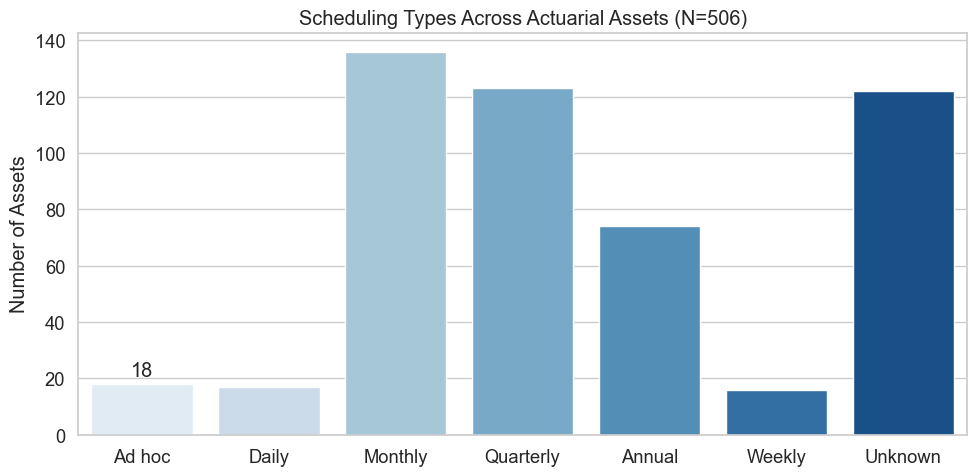

Exported: charts\scheduling_types_bar.png


In [6]:

# 3) Scheduling Types (bar chart)
sched_df = pd.DataFrame({'Schedule': list(scheduling_counts.keys()),
                         'Assets': list(scheduling_counts.values())})
plt.figure(figsize=(10,5))
ax = sns.barplot(data=sched_df, x='Schedule', y='Assets', palette='Blues')
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
ax.set_title('Scheduling Types Across Actuarial Assets (N=506)')
ax.set_xlabel(''); ax.set_ylabel('Number of Assets')
plt.tight_layout()
sched_path = out_dir / 'scheduling_types_bar.png'
plt.savefig(sched_path, dpi=300)
plt.show()
print(f'Exported: {sched_path}')



## 4) Optional: Build a single PowerPoint slide

This cell tries to build an **“Actuarial Inventory Overview”** slide that embeds all three PNGs and a governance note.

- Output: `Actuarial_Inventory_Overview_Slide1.ipynb_generated.pptx`
- If `python-pptx` is **not** available, it **gracefully skips** PPTX creation and reminds you how to install it.

> To enable PPTX export, run once in a cell:  


In [8]:


# 4) Build a single PowerPoint slide (optional, with graceful fallback)
try:
    from pptx import Presentation
    from pptx.util import Inches, Pt

    prs = Presentation()
    slide_layout = prs.slide_layouts[5]  # Title Only
    slide = prs.slides.add_slide(slide_layout)

    # Title
    title_shape = slide.shapes.title
    if title_shape is None:
        title_shape = slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(0.6))
    tf = title_shape.text_frame
    tf.text = 'Actuarial Inventory Overview'
    tf.paragraphs[0].font.size = Pt(28)
    tf.paragraphs[0].font.bold = True

    # Insert charts
    slide.shapes.add_picture(str(out_dir / 'functional_area_bar.png'), Inches(0.5), Inches(1.2), width=Inches(6.0))
    slide.shapes.add_picture(str(out_dir / 'complexity_bands_stacked_bar.png'), Inches(6.7), Inches(1.2), width=Inches(3.2))
    slide.shapes.add_picture(str(out_dir / 'scheduling_types_bar.png'), Inches(0.5), Inches(4.1), width=Inches(9.4))

    # Governance note
    footer_box = slide.shapes.add_textbox(Inches(0.5), Inches(6.6), Inches(9.4), Inches(0.6))
    ft = footer_box.text_frame
    p = ft.paragraphs[0]
    p.text = "Note: 'Unknown' cadence (122) indicates metadata gaps to close via catalog/governance."
    p.font.size = Pt(12)

    pptx_path = Path('Actuarial_Inventory_Overview_Slide1.ipynb_generated.pptx')
    prs.save(pptx_path)
    print(f'Exported PPTX: {pptx_path}')

except ModuleNotFoundError as e:
    print("python-pptx not installed. Skipping PPTX generation and completing charts only.")
    print("To enable PPTX export, run: %pip install python-pptx  (then re-run this cell)")



python-pptx not installed. Skipping PPTX generation and completing charts only.
To enable PPTX export, run: %pip install python-pptx  (then re-run this cell)
